In [1]:
import pandas as pd
from pandas_profiling import ProfileReport
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
seeds_dataset = pd.read_csv('C:/Users/chech/PC Febrero 2023/Platzi - Machine Learning/MLclasificacion/data/seeds.csv')

In [3]:
seeds_dataset

area  perimeter  major_axis_length  minor_axis_length  convex_area  \
0     56276    888.242           326.1485           220.2388        56831   
1     76631   1068.146           417.1932           234.2289        77280   
2     71623   1082.987           435.8328           211.0457        72663   
3     66458    992.051           381.5638           222.5322        67118   
4     66107    998.146           383.8883           220.4545        67117   
...     ...        ...                ...                ...          ...   
2495  79637   1224.710           533.1513           190.4367        80381   
2496  69647   1084.318           462.9416           191.8210        70216   
2497  87994   1210.314           507.2200           222.1872        88702   
2498  80011   1182.947           501.9065           204.7531        80902   
2499  84934   1159.933           462.8951           234.5597        85781   

      equiv_diameter  eccentricity  solidity  extent  roundness  \
0           267.6805        0.7376    0.9902  0.7453     0.8963   
1           312.3614        0.8275    0.9916  0.7151     0.8440   
2           301.9822        0.8749    0.9857  0.7400     0.7674   
3           290.8899        0.8123    0.9902  0.7396     0.8486   
4           290.1207        0.8187    0.9850  0.6752     0.8338   
...              ...           ...       ...     ...        ...   
2495        318.4289        0.9340    0.9907  0.4888     0.6672   
2496        297.7874        0.9101    0.9919  0.6002     0.7444   
2497        334.7199        0.8990    0.9920  0.7643     0.7549   
2498        319.1758        0.9130    0.9890  0.7374     0.7185   
2499        328.8485        0.8621    0.9901  0.7360     0.7933   

      aspect_ration  compactness          class  
0            1.4809       0.8207     Çerçevelik  
1            1.7811       0.7487     Çerçevelik  
2            2.0651       0.6929     Çerçevelik  
3            1.7146       0.7624     Çerçevelik  
4            1.7413       0.7557     Çerçevelik  
...             ...          ...            ...  
2495         2.7996       0.5973  Ürgüp Sivrisi  
2496         2.4134       0.6433  Ürgüp Sivrisi  
2497         2.2828       0.6599  Ürgüp Sivrisi  
2498         2.4513       0.6359  Ürgüp Sivrisi  
2499         1.9735       0.7104  Ürgüp Sivrisi  

[2500 rows x 13 columns]

### EDA (Exploratory Data Analysis)

In [4]:
seeds_dataset.describe().round(2)

area  perimeter  major_axis_length  minor_axis_length  \
count    2500.00    2500.00            2500.00            2500.00   
mean    80658.22    1130.28             456.60             225.79   
std     13664.51     109.26              56.24              23.30   
min     47939.00     868.48             320.84             152.17   
25%     70765.00    1048.83             414.96             211.25   
50%     79076.00    1123.67             449.50             224.70   
75%     89757.50    1203.34             492.74             240.67   
max    136574.00    1559.45             661.91             305.82   

       convex_area  equiv_diameter  eccentricity  solidity   extent  \
count      2500.00         2500.00       2500.00   2500.00  2500.00   
mean      81508.08          319.33          0.86      0.99     0.69   
std       13764.09           26.89          0.05      0.00     0.06   
min       48366.00          247.06          0.49      0.92     0.47   
25%       71512.00          300.17          0.83      0.99     0.66   
50%       79872.00          317.31          0.86      0.99     0.71   
75%       90797.75          338.06          0.90      0.99     0.74   
max      138384.00          417.00          0.95      0.99     0.83   

       roundness  aspect_ration  compactness  
count    2500.00        2500.00      2500.00  
mean        0.79           2.04         0.70  
std         0.06           0.32         0.05  
min         0.55           1.15         0.56  
25%         0.75           1.80         0.66  
50%         0.80           1.98         0.71  
75%         0.83           2.26         0.74  
max         0.94           3.14         0.90

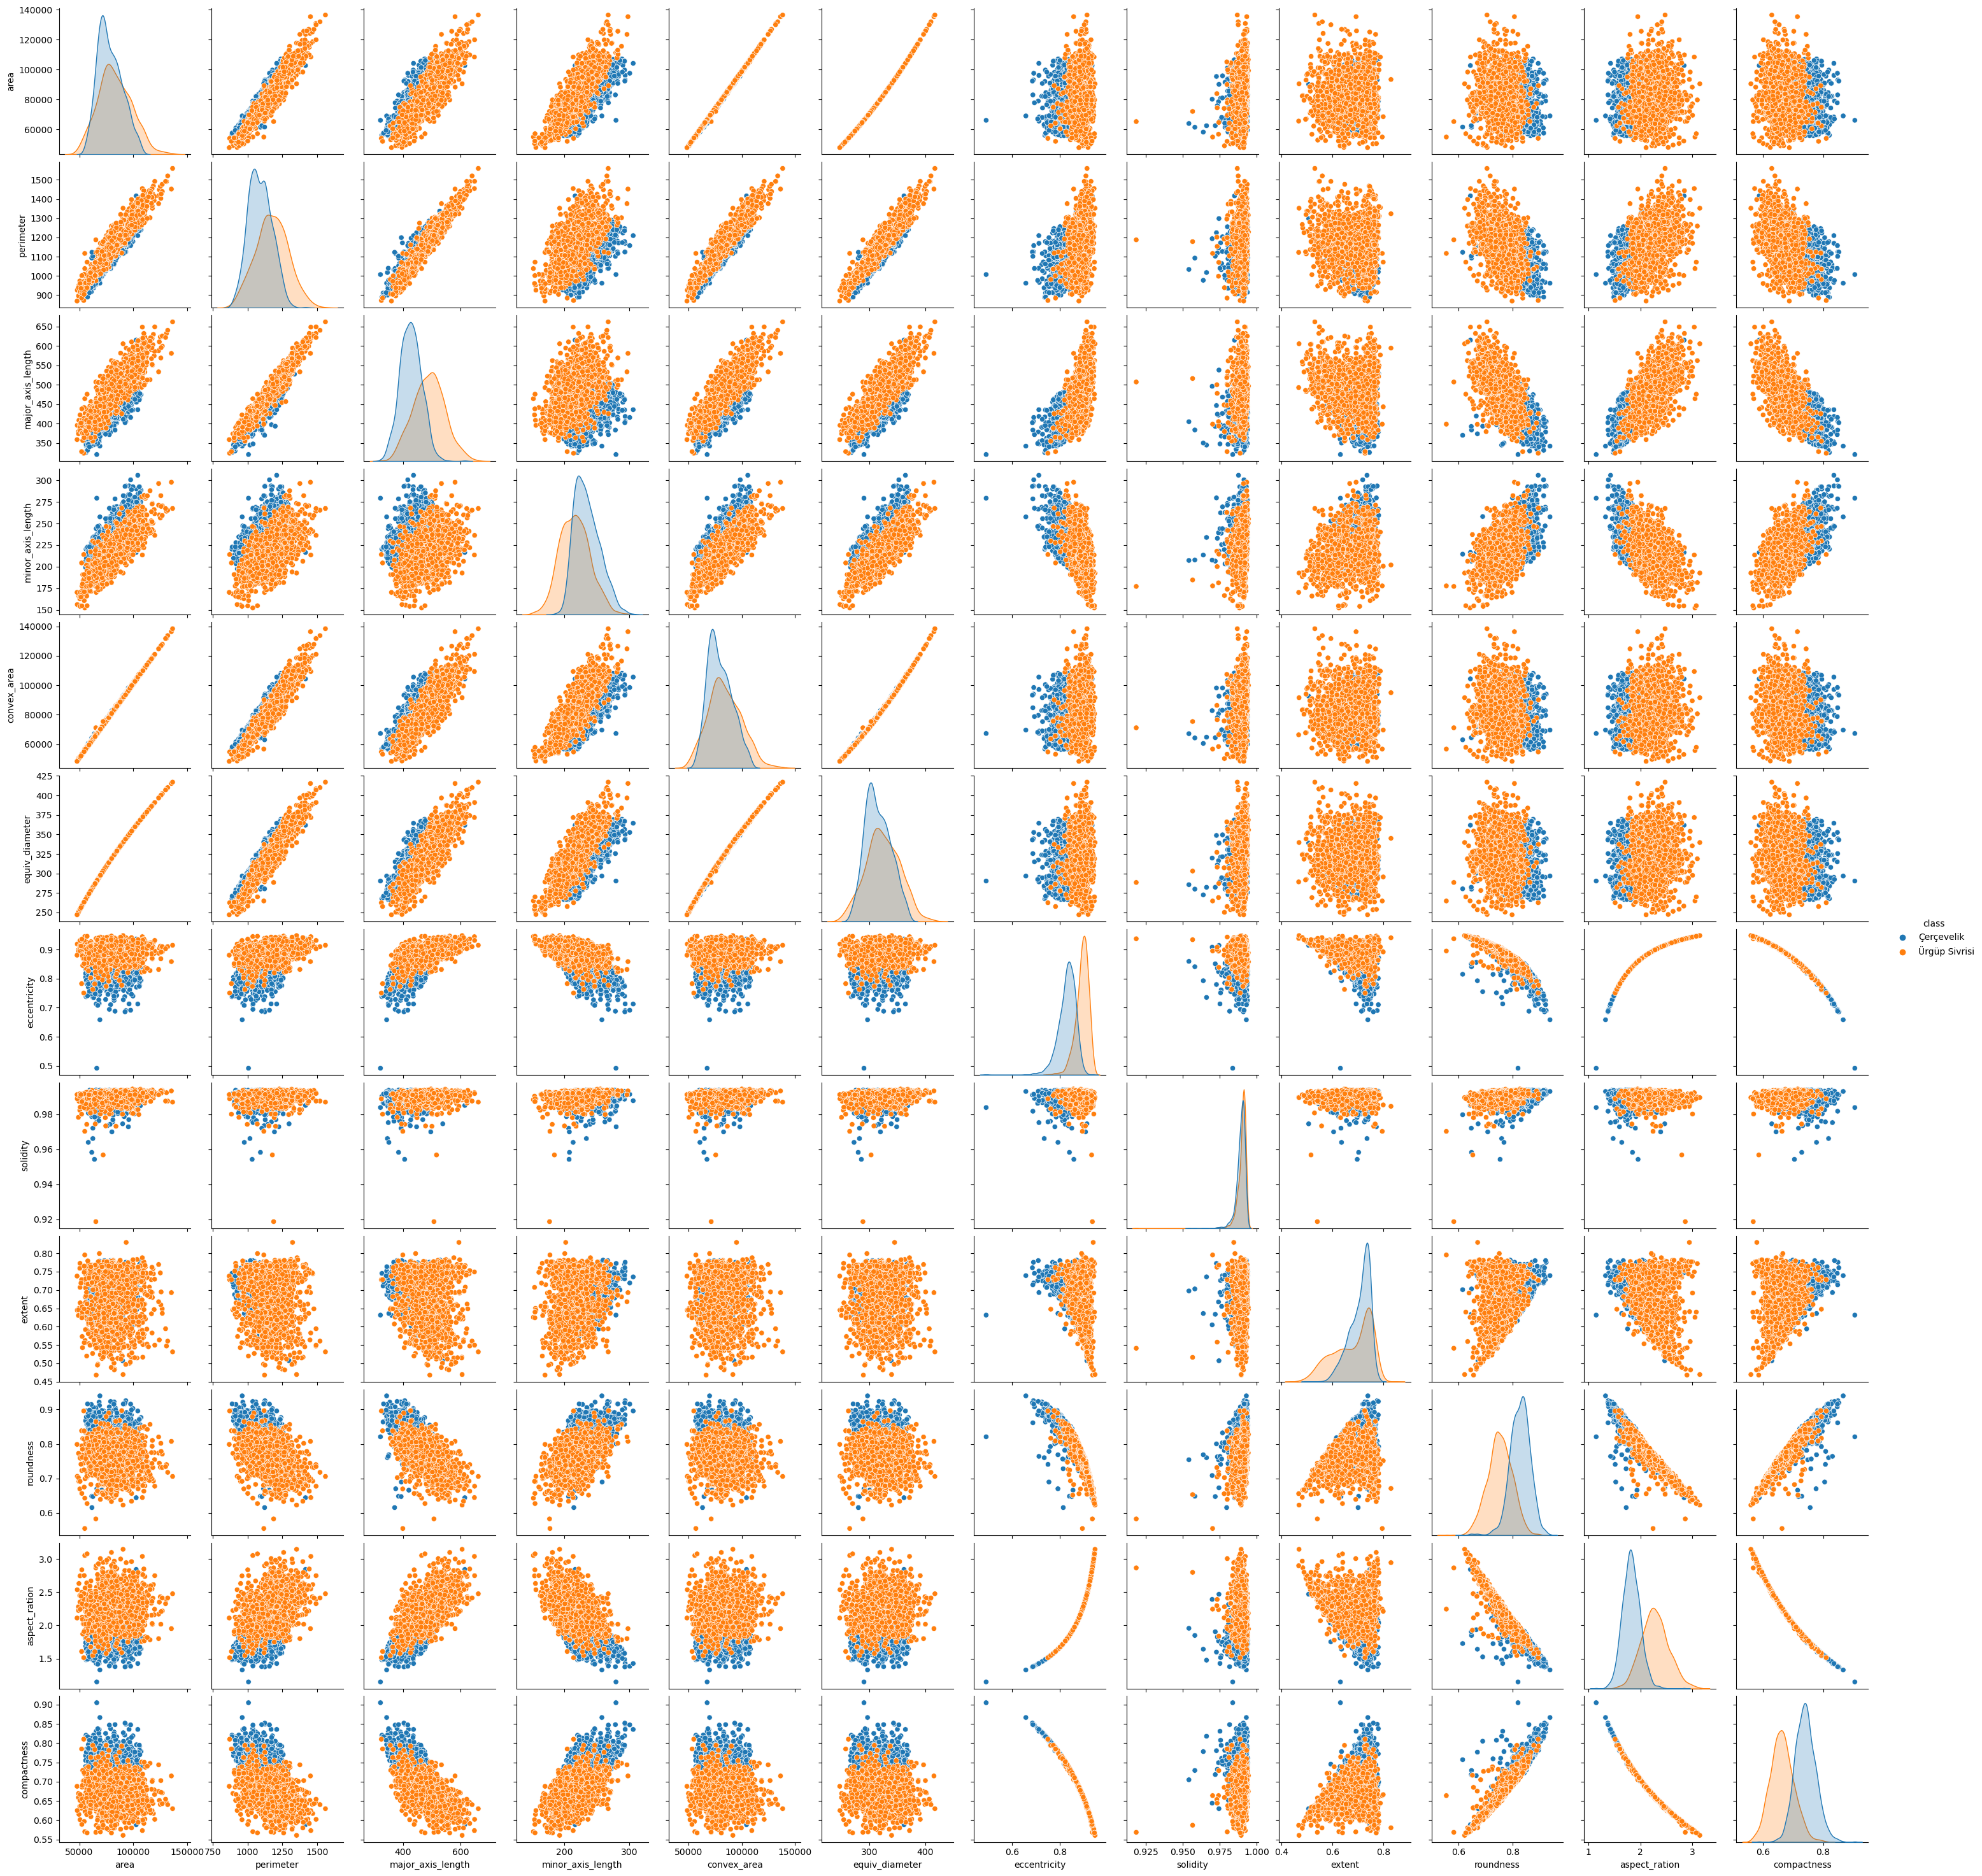

In [5]:
%matplotlib inline
sns.pairplot(data=seeds_dataset, hue='class')

## Algoritmo PCA - Descomposición de componentes principales.

In [6]:
seed_types = seeds_dataset[['class']]
seed_types

class
0        Çerçevelik
1        Çerçevelik
2        Çerçevelik
3        Çerçevelik
4        Çerçevelik
...             ...
2495  Ürgüp Sivrisi
2496  Ürgüp Sivrisi
2497  Ürgüp Sivrisi
2498  Ürgüp Sivrisi
2499  Ürgüp Sivrisi

[2500 rows x 1 columns]

In [7]:
# Eliminar las columnas con alta correlación y la columna "class" que es la target del modelo.
seed_data = seeds_dataset.drop(labels=['area', 'perimeter','class'], axis='columns')
seed_data

major_axis_length  minor_axis_length  convex_area  equiv_diameter  \
0              326.1485           220.2388        56831        267.6805   
1              417.1932           234.2289        77280        312.3614   
2              435.8328           211.0457        72663        301.9822   
3              381.5638           222.5322        67118        290.8899   
4              383.8883           220.4545        67117        290.1207   
...                 ...                ...          ...             ...   
2495           533.1513           190.4367        80381        318.4289   
2496           462.9416           191.8210        70216        297.7874   
2497           507.2200           222.1872        88702        334.7199   
2498           501.9065           204.7531        80902        319.1758   
2499           462.8951           234.5597        85781        328.8485   

      eccentricity  solidity  extent  roundness  aspect_ration  compactness  
0           0.7376    0.9902  0.7453     0.8963         1.4809       0.8207  
1           0.8275    0.9916  0.7151     0.8440         1.7811       0.7487  
2           0.8749    0.9857  0.7400     0.7674         2.0651       0.6929  
3           0.8123    0.9902  0.7396     0.8486         1.7146       0.7624  
4           0.8187    0.9850  0.6752     0.8338         1.7413       0.7557  
...            ...       ...     ...        ...            ...          ...  
2495        0.9340    0.9907  0.4888     0.6672         2.7996       0.5973  
2496        0.9101    0.9919  0.6002     0.7444         2.4134       0.6433  
2497        0.8990    0.9920  0.7643     0.7549         2.2828       0.6599  
2498        0.9130    0.9890  0.7374     0.7185         2.4513       0.6359  
2499        0.8621    0.9901  0.7360     0.7933         1.9735       0.7104  

[2500 rows x 10 columns]

In [8]:
# Entrenar el modelo con las semillas Recudir los features seleccionados en el paso anterior. 
pca = PCA(n_components=2)
pca.fit(seed_data)

PCA(n_components=2)

In [9]:
# Transformar los datos. 
data = pca.transform(seed_data)
reduce_data = pd.DataFrame(data, columns=['x', 'y'])
reduce_data

x          y
0    -24677.420366 -55.861828
1     -4228.182400 -29.019901
2     -8845.133572   8.928280
3    -14390.273736 -31.638275
4    -14391.270146 -28.634810
...            ...        ...
2495  -1126.871652  86.997882
2496 -11292.057649  47.567534
2497   7194.048696  29.890569
2498   -605.958361  51.392517
2499   4272.931407  -8.395539

[2500 rows x 2 columns]

In [10]:
reduce_data['class'] = seed_types
reduce_data

x          y          class
0    -24677.420366 -55.861828     Çerçevelik
1     -4228.182400 -29.019901     Çerçevelik
2     -8845.133572   8.928280     Çerçevelik
3    -14390.273736 -31.638275     Çerçevelik
4    -14391.270146 -28.634810     Çerçevelik
...            ...        ...            ...
2495  -1126.871652  86.997882  Ürgüp Sivrisi
2496 -11292.057649  47.567534  Ürgüp Sivrisi
2497   7194.048696  29.890569  Ürgüp Sivrisi
2498   -605.958361  51.392517  Ürgüp Sivrisi
2499   4272.931407  -8.395539  Ürgüp Sivrisi

[2500 rows x 3 columns]

<Axes: xlabel='x', ylabel='y'>

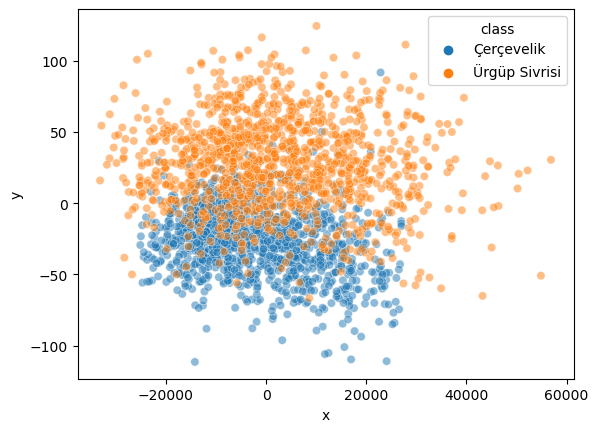

In [11]:
sns.scatterplot(x='x', y='y', hue='class', data=reduce_data, alpha=0.5)

### Feature Engineering

In [12]:
seeds_dataset_clean = seeds_dataset.drop(labels=['area', 'perimeter'], axis='columns')
seeds_dataset_clean.head()

major_axis_length  minor_axis_length  convex_area  equiv_diameter  \
0           326.1485           220.2388        56831        267.6805   
1           417.1932           234.2289        77280        312.3614   
2           435.8328           211.0457        72663        301.9822   
3           381.5638           222.5322        67118        290.8899   
4           383.8883           220.4545        67117        290.1207   

   eccentricity  solidity  extent  roundness  aspect_ration  compactness  \
0        0.7376    0.9902  0.7453     0.8963         1.4809       0.8207   
1        0.8275    0.9916  0.7151     0.8440         1.7811       0.7487   
2        0.8749    0.9857  0.7400     0.7674         2.0651       0.6929   
3        0.8123    0.9902  0.7396     0.8486         1.7146       0.7624   
4        0.8187    0.9850  0.6752     0.8338         1.7413       0.7557   

        class  
0  Çerçevelik  
1  Çerçevelik  
2  Çerçevelik  
3  Çerçevelik  
4  Çerçevelik

In [13]:
from sklearn.model_selection import  train_test_split

rest, test = train_test_split(seeds_dataset_clean, test_size=0.2, shuffle=True) # 20% of 100 = 20
train, val = train_test_split(rest, test_size=0.25, shuffle=True) # 25% of 80=20

distributions = [len(train), len(val), len(test)]
print(distributions)
print([dist/len(reduce_data) for dist in distributions])

[1500, 500, 500]
[0.6, 0.2, 0.2]


In [17]:
train_x = train.drop(labels=['class'], axis='columns')
val_x = val.drop(labels=['class'], axis='columns')
test_x = test.drop(labels=['class'], axis='columns')

In [20]:
train_y = train[['class']].copy()
val_y = val[['class']].copy()
test_y = test[['class']].copy()

In [25]:
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler, MaxAbsScaler

major_axis_length_scaler = MaxAbsScaler()

In [28]:
# Escalar los valores de la columna "major_axis_length"
major_axis_length_scaler.fit(train_x[['major_axis_length']])

MaxAbsScaler()

In [29]:
# Copia del dataset "major_axis_length_scaler"
major_axis_length_frame = train[['major_axis_length']].copy()
# Se agrega una nueva columna, para comparar los valores escalados con los originales. 
major_axis_length_frame['scaled'] = major_axis_length_scaler.transform(train_x[['major_axis_length']])

In [32]:
major_axis_length_frame.describe().round(2)

major_axis_length   scaled
count            1500.00  1500.00
mean              456.14     0.69
std                56.22     0.08
min               324.01     0.49
25%               415.37     0.63
50%               448.70     0.68
75%               492.74     0.74
max               661.91     1.00

In [34]:
# Aplicación del escalador a todo el dataset. 
scaler = MaxAbsScaler()
scaler.fit(train_x)

MaxAbsScaler()

In [35]:
train_x_scaled = scaler.transform(train_x)
val_x_scaled = scaler.transform(val_x)
test_x_scaled = scaler.transform(test_x)

<h1> Entrenando el modelo </h1>

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
train_x_scaled

array([[0.64162963, 0.64755312, 0.48086484, ..., 0.81674429, 0.68203791,
        0.79988263],
       [0.83945764, 0.62088922, 0.59657908, ..., 0.70237193, 0.9306386 ,
        0.68039906],
       [0.63677339, 0.69247297, 0.50903284, ..., 0.86180006, 0.63296654,
        0.82946009],
       ...,
       [0.75140249, 0.7292298 , 0.63269598, ..., 0.82779162, 0.70926091,
        0.7850939 ],
       [0.86809078, 0.87025093, 0.87135073, ..., 0.83927218, 0.68661748,
        0.79671362],
       [0.6705758 , 0.79614542, 0.62013672, ..., 0.89927434, 0.57976084,
        0.86830986]])

In [41]:
# Entrenando el modelo
lr = LogisticRegression()

lr.fit(train_x_scaled, train_y)

c:\Users\chech\anaconda3\envs\MLclas\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()